# GetAround

## Analyses


In [132]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

In [133]:
URL_DELAY = "https://full-stack-assets.s3.eu-west-3.amazonaws.com/Deployment/get_around_delay_analysis.xlsx"
URL_PRICING = "https://full-stack-assets.s3.eu-west-3.amazonaws.com/Deployment/get_around_pricing_project.csv"

In [134]:

df = pd.read_excel(URL_DELAY, sheet_name='rentals_data', engine="openpyxl")

df.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN


In [135]:
df.describe(include="all")

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.000000,21310.000000,21310,21310,16346.000000,1841.000000,1841.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN
top,NaN,NaN,mobile,ended,NaN,NaN,NaN
freq,NaN,NaN,17003,18045,NaN,NaN,NaN
mean,549712.880338,350030.603426,NaN,NaN,59.701517,550127.411733,279.288430
std,13863.446964,58206.249765,NaN,NaN,1002.561635,13184.023111,254.594486
min,504806.000000,159250.000000,NaN,NaN,-22433.000000,505628.000000,0.000000
25%,540613.250000,317639.000000,NaN,NaN,-36.000000,540896.000000,60.000000
50%,550350.000000,368717.000000,NaN,NaN,9.000000,550567.000000,180.000000
75%,560468.500000,394928.000000,NaN,NaN,67.000000,560823.000000,540.000000


On retire les locations annulées

In [136]:
df = df.loc[df["state"] == "ended", :]

df.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN
5,511626,398802,mobile,ended,-203.0,NaN,NaN
6,511639,370585,connect,ended,-15.0,563782.0,570.0


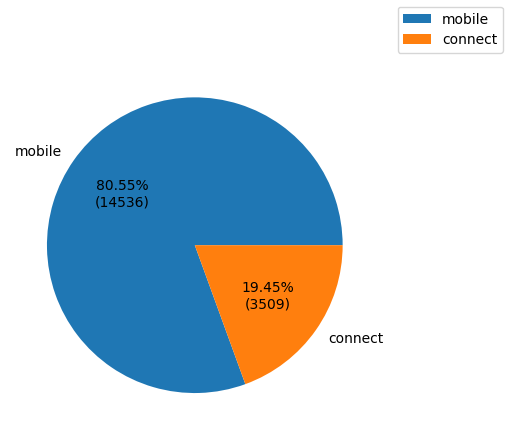

In [137]:
type_value_counts = df.checkin_type.value_counts()
plt.pie(type_value_counts, labels=type_value_counts.index, autopct=lambda p:f'{p:.2f}%\n({p*sum(type_value_counts)/100 :.0f})')
plt.figlegend(type_value_counts.index)
plt.show()

In [138]:
def get_delay_state(minutes):
    if (minutes < 0):
        return "early"
    elif (minutes > 0 ):
        return "late"
    else:
        return "on time"

df["delay_state"] = df["delay_at_checkout_in_minutes"].apply(get_delay_state)

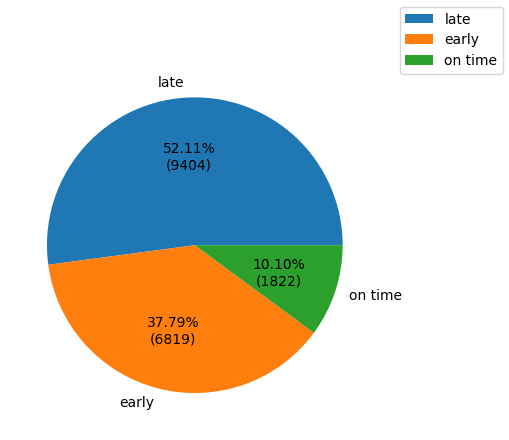

In [139]:
delay_state_value_counts = df.delay_state.value_counts()
plt.pie(delay_state_value_counts, labels=delay_state_value_counts.index, autopct=lambda p:f'{p:.2f}%\n({p*sum(delay_state_value_counts)/100 :.0f})')
plt.figlegend(delay_state_value_counts.index)
plt.show()

In [140]:
px.histogram(
    df.loc[(df["delay_at_checkout_in_minutes"] > 0) & (df["delay_at_checkout_in_minutes"] <= 200), ], 
    x="delay_at_checkout_in_minutes", 
    nbins=40,
    color="checkin_type"
)

In [141]:
def late_category(x):
    if (x > 60*24):
        return "> 1 day"
    elif (x > 60*2):
        return "> 2 hours"
    elif (x > 60):
        return "between 1h & 2h"
    elif (x > 30):
        return "between 30min & 1h"
    elif (x > 15):
        return "between 15min & 30min"
    elif (x > 0):
        return "< 15min"
    else:
        return "on time"

late_category_ordered = ["on time", "< 15min", "between 15min & 30min", "between 30min & 1h",
                               "between 1h & 2h", "> 2 hours", "> 1 day"]

df["late_category"] = df.delay_at_checkout_in_minutes.apply(late_category)
df["late_category"] = pd.Categorical(df["late_category"], ordered=True,
                   categories=late_category_ordered)

In [142]:
px.histogram(
    df.sort_values(['late_category']), 
    x="late_category", 
    nbins=7,
    color="checkin_type"
)

In [143]:
df.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,delay_state,late_category
1,507750,269550,mobile,ended,-81.0,NaN,NaN,early,on time
2,508131,359049,connect,ended,70.0,NaN,NaN,late,between 1h & 2h
4,511440,313932,mobile,ended,NaN,NaN,NaN,on time,on time
5,511626,398802,mobile,ended,-203.0,NaN,NaN,early,on time
6,511639,370585,connect,ended,-15.0,563782.0,570.0,early,on time


In [144]:
linked_df = pd.merge(left=df, right=df, how="left", 
                     left_on="previous_ended_rental_id", right_on="rental_id", suffixes=('', '_previous'))

linked_df = linked_df.drop(["car_id", "state", "delay_at_checkout_in_minutes", "rental_id_previous", "car_id_previous", 
              "previous_ended_rental_id_previous", "time_delta_with_previous_rental_in_minutes_previous", 
              "state_previous"], axis=1)

linked_df = linked_df.rename({
    "time_delta_with_previous_rental_in_minutes": "time_delta_in_minutes"
    }, axis=1)

linked_df = linked_df.loc[linked_df.previous_ended_rental_id.isna() == False, :]
linked_df.head()

,rental_id,checkin_type,previous_ended_rental_id,time_delta_in_minutes,delay_state,late_category,checkin_type_previous,delay_at_checkout_in_minutes_previous,delay_state_previous,late_category_previous
4,511639,connect,563782.0,570.0,early,on time,connect,136.0,late,> 2 hours
13,519491,mobile,545639.0,420.0,late,between 30min & 1h,mobile,140.0,late,> 2 hours
16,521156,mobile,537298.0,0.0,on time,on time,mobile,NaN,on time,on time
24,525044,mobile,510607.0,60.0,on time,on time,mobile,-113.0,early,on time
30,528808,connect,557404.0,330.0,early,on time,connect,-352.0,early,on time


In [145]:
linked_df["delay_at_checkout_in_minutes_previous"] = linked_df["delay_at_checkout_in_minutes_previous"].apply(lambda x: x if x > 0 else 0)
linked_df["delta_checkout_next_checkin"] = (linked_df["time_delta_in_minutes"] - linked_df["delay_at_checkout_in_minutes_previous"]) * -1
linked_df["late_for_next_checkin"] = linked_df["delta_checkout_next_checkin"] > 0
linked_df.loc[linked_df.late_for_next_checkin].head()

,rental_id,checkin_type,previous_ended_rental_id,time_delta_in_minutes,delay_state,late_category,checkin_type_previous,delay_at_checkout_in_minutes_previous,delay_state_previous,late_category_previous,delta_checkout_next_checkin,late_for_next_checkin
124,540479,mobile,539751.0,0.0,late,< 15min,mobile,3.0,late,< 15min,3.0,True
138,541862,mobile,540607.0,0.0,late,> 2 hours,mobile,1.0,late,< 15min,1.0,True
378,559781,mobile,540868.0,0.0,late,between 30min & 1h,mobile,26.0,late,between 15min & 30min,26.0,True
606,574568,mobile,572909.0,0.0,late,between 1h & 2h,mobile,13.0,late,< 15min,13.0,True
697,535519,connect,533413.0,0.0,early,on time,connect,4.0,late,< 15min,4.0,True


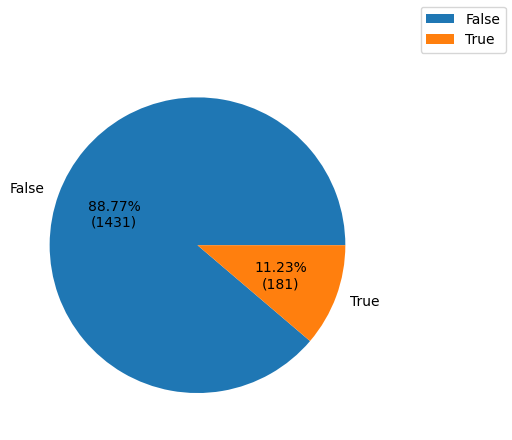

In [146]:
late_checkin_value_counts = linked_df.late_for_next_checkin.value_counts()
plt.pie(late_checkin_value_counts, labels=late_checkin_value_counts.index, autopct=lambda p:f'{p:.2f}%\n({p*sum(late_checkin_value_counts)/100 :.0f})')
plt.figlegend(late_checkin_value_counts.index)
plt.show()

In [147]:
px.histogram(
    linked_df.loc[(linked_df["delta_checkout_next_checkin"] < (60 * 24)) & (linked_df["delta_checkout_next_checkin"] > 0), :], 
    x="delta_checkout_next_checkin", 
    nbins=24*4
)

In [148]:
linked_df["delta_checkout_next_checkin"] = linked_df["delta_checkout_next_checkin"].apply(late_category)
linked_df["delta_checkout_next_checkin"] = pd.Categorical(linked_df["delta_checkout_next_checkin"], ordered=True,
                   categories=late_category_ordered)

In [149]:
px.histogram(
    linked_df.sort_values(['delta_checkout_next_checkin']), 
    x="delta_checkout_next_checkin", 
    nbins=7,
    color="checkin_type"
)

In [189]:
THRESHOLD = 61 # Delay in minutes
SCOPE = "mobile" # Only for mobile car

In [190]:
linked_df["is_removed_by_new_rules"] = (linked_df["time_delta_in_minutes"] < THRESHOLD) & (linked_df["checkin_type"] == SCOPE)
linked_df[["time_delta_in_minutes", "checkin_type", "is_removed_by_new_rules"]].head()

,time_delta_in_minutes,checkin_type,is_removed_by_new_rules
4,570.0,connect,False
13,420.0,mobile,False
16,0.0,mobile,True
24,60.0,mobile,True
30,330.0,connect,False


In [191]:
print("Rent removed by the new rules :")
print(linked_df.loc[linked_df["is_removed_by_new_rules"]].count().iloc[0])
print((linked_df.loc[linked_df["is_removed_by_new_rules"]].count().iloc[0] / linked_df.count() * 100).iloc[0], ' %')

Rent removed by the new rules :
297
18.424317617866002  %


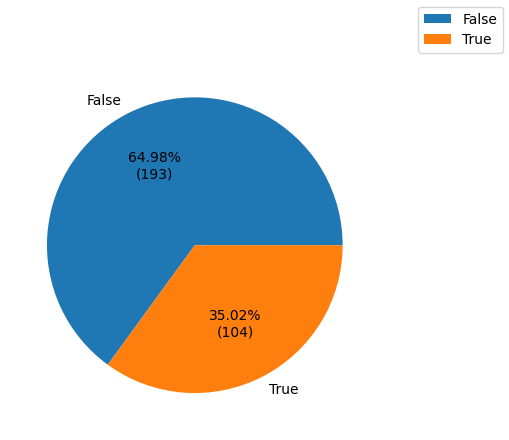

In [192]:
rent_removed = linked_df.loc[linked_df["is_removed_by_new_rules"],:]

rent_removed_late_checkin_value_counts = rent_removed.late_for_next_checkin.value_counts()
plt.pie(rent_removed_late_checkin_value_counts, labels=rent_removed_late_checkin_value_counts.index, autopct=lambda p:f'{p:.2f}%\n({p*sum(rent_removed_late_checkin_value_counts)/100 :.0f})')
plt.figlegend(rent_removed_late_checkin_value_counts.index)
plt.show()